In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder

In [96]:
car_data = pd.read_csv("CarDekho.csv")

In [97]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [98]:
nan_data = list[car_data.isna().any()]
nan_data

list[Make                  False
Model                 False
Price                 False
Year                  False
Kilometer             False
Fuel Type             False
Transmission          False
Location              False
Color                 False
Owner                 False
Seller Type           False
Engine                 True
Max Power              True
Max Torque             True
Drivetrain             True
Length                 True
Width                  True
Height                 True
Seating Capacity       True
Fuel Tank Capacity     True
dtype: bool]

In [99]:
car_data = car_data.fillna(car_data.mean())

C:\Users\gabri\AppData\Local\Temp\ipykernel_48912\4283012844.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_data = car_data.fillna(car_data.mean())


In [100]:
nan_data = list[car_data.isna().any()]
nan_data

list[Make                  False
Model                 False
Price                 False
Year                  False
Kilometer             False
Fuel Type             False
Transmission          False
Location              False
Color                 False
Owner                 False
Seller Type           False
Engine                 True
Max Power              True
Max Torque             True
Drivetrain             True
Length                False
Width                 False
Height                False
Seating Capacity      False
Fuel Tank Capacity    False
dtype: bool]

In [101]:
for column in ["Length","Width","Height","Seating Capacity","Fuel Tank Capacity"]:
    car_data[column] = car_data[column].round(0)

In [102]:
for column in ["Engine","Max Power","Max Torque","Drivetrain"]:
    mode = str(car_data[column].mode())
    car_data[column] = car_data[column].replace(np.NaN, mode)

In [103]:
nan_data = list[car_data.isna().any()]
nan_data

list[Make                  False
Model                 False
Price                 False
Year                  False
Kilometer             False
Fuel Type             False
Transmission          False
Location              False
Color                 False
Owner                 False
Seller Type           False
Engine                False
Max Power             False
Max Torque            False
Drivetrain            False
Length                False
Width                 False
Height                False
Seating Capacity      False
Fuel Tank Capacity    False
dtype: bool]

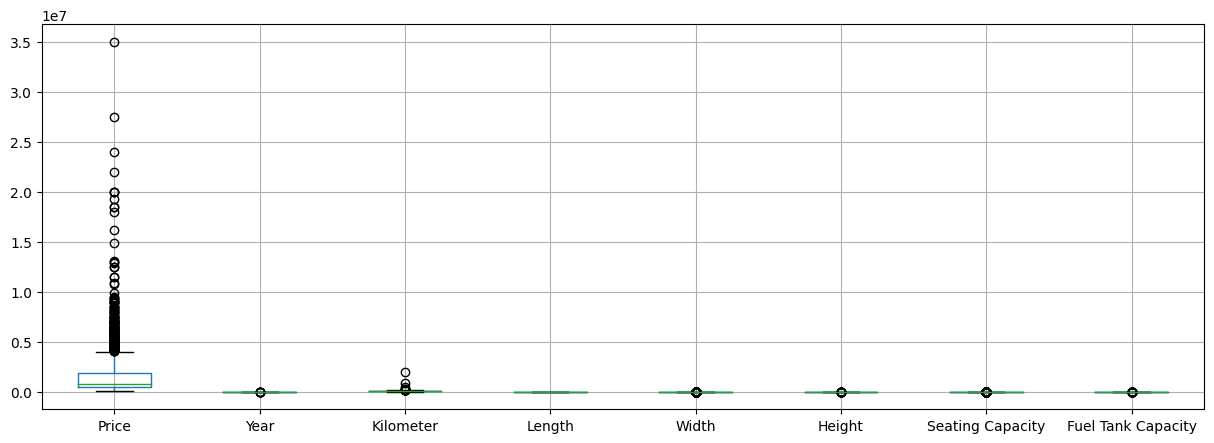

In [104]:
car_data.boxplot(figsize=(15,5))
plt.show()

In [105]:
# iqr = np.percentile(car_data['Price'], 75) - np.percentile(car_data['Price'], 25)
# upper_outlier_bound = np.percentile(car_data['Price'], 75) + 1.5 * iqr
# lower_outlier_bound = np.percentile(car_data['Price'], 25) - 1.5 * iqr
# outliers = car_data[(car_data['Price'] > upper_outlier_bound) | (car_data['Price'] < lower_outlier_bound)]


# car_data = car_data.drop(outliers.index)

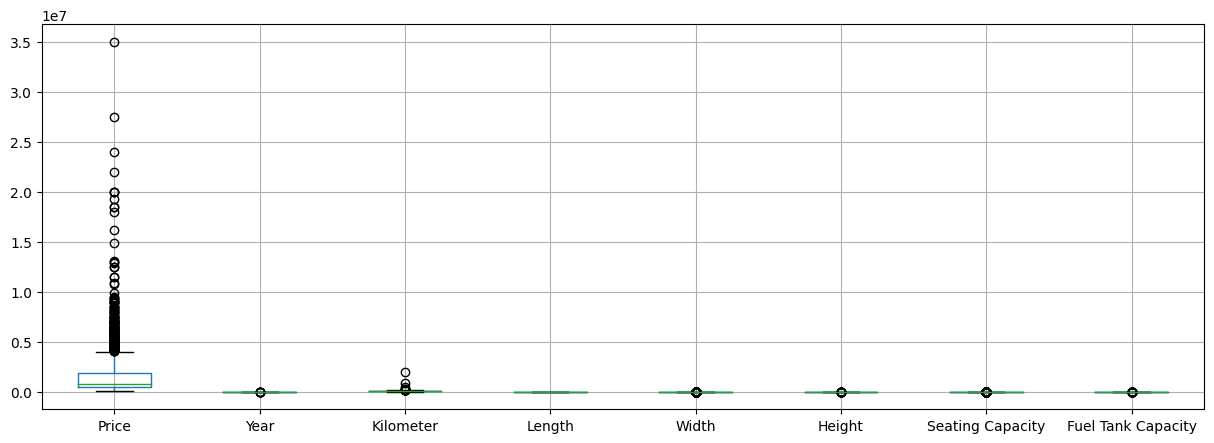

In [106]:
car_data.boxplot(figsize=(15,5))
plt.show()

In [107]:
# normalizar data using sklearn 

# scaler = StandardScaler()

to_scale = ['Price',"Year","Kilometer","Length","Width","Height","Seating Capacity", "Fuel Tank Capacity"]

# # car_data[to_scale] = scaler.fit_transform(car_data[to_scale])

for column in to_scale:
    
    x_min = car_data[column].min()
    x_max = car_data[column].max()

    car_data[column] = (car_data[column] - x_min)/(x_max - x_min)



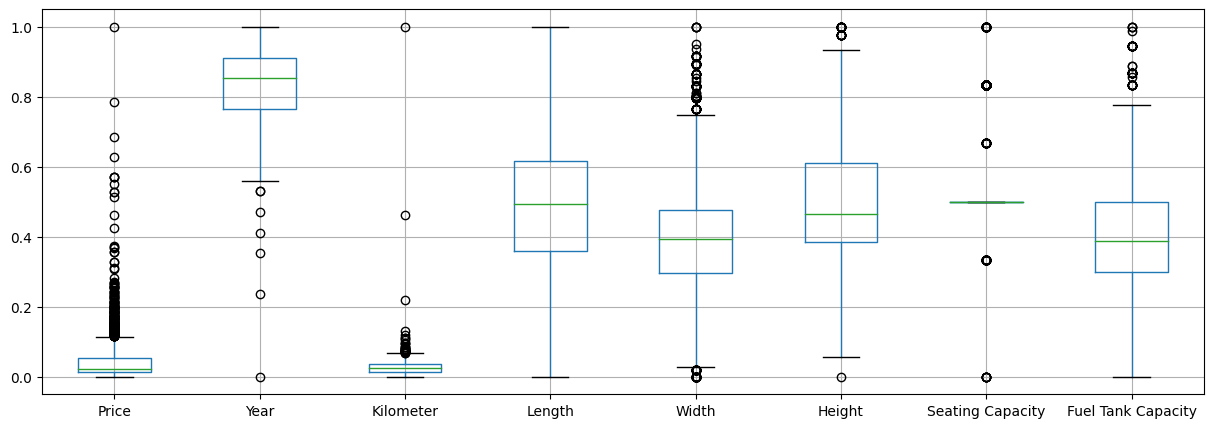

In [108]:
car_data.boxplot(figsize=(15,5))
plt.show()

In [109]:
# Drop non relevant columns 

car_data = car_data.drop('Max Power', axis=1)
car_data = car_data.drop('Max Torque', axis=1)

In [110]:
# Categorizamos la data no numerica

categoric = ["Make", "Fuel Type", "Transmission", "Owner"]

encoder = OneHotEncoder(handle_unknown='ignore', use_cat_names=True, cols = ["Make", "Fuel Type", "Transmission", "Owner"])

encoder.fit(car_data)

car_data_encoded = encoder.transform(car_data)

In [111]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   float64
 3   Year                2059 non-null   float64
 4   Kilometer           2059 non-null   float64
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Drivetrain          2059 non-null   object 
 13  Length              2059 non-null   float64
 14  Width               2059 non-null   float64
 15  Height              2059 non-null   float64
 16  Seatin

In [112]:
car_data_encoded.to_csv("car_data_preprocessed.csv")

In [113]:
# Fill NA with random col val
# car_data[''].fillna(car_data[''].sample(1), inplace=True)